# Exploratory data analysis (EDA) of car data

## Libraries and settings

In [49]:
# Libraries
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime, timedelta

# seaborn graphics settings
sns.set_theme(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/python_exploratory_data_analysis


## Importing the car data

### Importing the car data

In [50]:
# Columns to read
columns = ["Offer_Id",
            "Type",
            "Price",
            "HP",
            "Mileage",
            "Fuel_Type",
            "Transmission",
            "Dealer_PLZ",
            "Dealer_City",
            "Dealer_Street_House_Nr",
            "Init_Regist_MY",
            "Init_Regist_Month",
            "Init_Regist_Year",
            "Init_Regist_Dt"]

# Read and select variables
df_orig = pd.read_csv("autoscout24_data_enriched_cleaned.csv", sep=",")[columns]

# Change column names to lower case
df_orig.columns = df_orig.columns.str.lower()

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df = df_orig.dropna()
df.head(5)

,offer_id,type,price,hp,mileage,fuel_type,transmission,dealer_plz,dealer_city,dealer_street_house_nr,init_regist_my,init_regist_month,init_regist_year,init_regist_dt
0,7324420,AUDI A5 Sportback 3.0 TDI quattro S-tronic (Li...,22500,245,75000,Diesel,Automatisiertes Schaltgetriebe,8488,Turbenthal,Mettlenstrasse 3,10.2014,10.0,2014.0,2014-10
1,7512768,MERCEDES-BENZ SLK 200 7G-Tronic (Cabriolet),23749,184,46655,Benzin,Automat sequentiell,3186,Düdingen,Brugerastrasse 60,6.2013,6.0,2013.0,2013-06
2,7512034,MERCEDES-BENZ C 350 Avantgarde 4Matic 7G-Troni...,18500,306,138955,Benzin,Automat sequentiell,1262,Eysins,1262 Eysins,6.2011,6.0,2011.0,2011-06
3,7512728,MERCEDES-BENZ A 45 AMG 4Matic Speedshift 7G-DC...,36000,360,43000,Benzin,Automatisiertes Schaltgetriebe,4314,Zeiningen,Am Stutz 21,8.2015,8.0,2015.0,2015-08
4,7490242,AUDI A5 Sportback 2.0 TFSI Sport quattro S-tro...,48500,252,43300,Benzin,Automatisiertes Schaltgetriebe,3250,Lyss,3250 Lyss,9.2018,9.0,2018.0,2018-09


## Univariate non-graphical exploratory data analysis (EDA)

### Quantiles

In [51]:
# Calculate Quantiles 
df[['price', 'hp', 'mileage']].quantile(
    q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)


,price,hp,mileage
0.05,4000.0,90.0,13700.0
0.10,5900.0,110.0,23000.0
0.25,10900.0,150.0,45000.0
0.50,19900.0,204.0,83500.0
0.75,35900.0,306.0,130000.0
0.90,56900.0,405.0,176000.0
0.95,72500.0,469.5,206090.5


### Shape (number of rows and colums)

In [52]:
# Number of rows and columns
print(df.shape)

(3971, 14)


### Data types

In [53]:
# Show data types
df.dtypes

offer_id                    int64
type                       object
price                       int64
hp                          int64
mileage                     int64
fuel_type                  object
transmission               object
dealer_plz                  int64
dealer_city                object
dealer_street_house_nr     object
init_regist_my            float64
init_regist_month         float64
init_regist_year          float64
init_regist_dt             object
dtype: object

### Summary statistics of numeric variables

In [54]:
# Show summary statistics of variables
df.describe()

,offer_id,price,hp,mileage,dealer_plz,init_regist_my,init_regist_month,init_regist_year
count,3.971000e+03,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000
mean,7.242907e+06,27527.641652,235.831025,92952.412491,5522.633594,6.510513,6.309494,2010.189121
std,4.655890e+05,26670.221155,119.671388,61097.990134,2848.337824,3.386338,3.386320,9.610067
min,1.395491e+06,160.000000,16.000000,1.000000,1000.000000,1.194600,1.000000,1929.000000
25%,7.249691e+06,10900.000000,150.000000,45000.000000,3014.000000,3.201800,3.000000,2008.000000
50%,7.408668e+06,19900.000000,204.000000,83500.000000,6003.000000,6.201400,6.000000,2013.000000
75%,7.456806e+06,35900.000000,306.000000,130000.000000,8304.500000,9.201500,9.000000,2016.000000
max,7.512843e+06,428000.000000,772.000000,370000.000000,9657.000000,12.201900,12.000000,2020.000000


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [63]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Mileage
print('Mileage:',
      'Count:', round(df.mileage.count(), 1),
      'Min:', round(df.mileage.min(), 1),
      'Max:', round(df.mileage.max(), 1),
      'Mean:', round(df.mileage.mean(), 1),
      'Median:', round(df.mileage.median(), 1),
      'Std:', round(df.mileage.std(), 1))

Price: Count: 3971 Min: 160 Max: 428000 Mean: 27527.6 Median: 19900.0 Std: 26670.2
Mileage: Count: 3971 Min: 1 Max: 370000 Mean: 92952.4 Median: 83500.0 Std: 61098.0


### Skewness

In [59]:
# Show skewness of selected variables

df[['price', 'mileage', 'hp']].skew()




price      4.077049
mileage    0.886538
hp         1.093046
dtype: float64

### Kurtosis

In [62]:
# Show kurtosis of selected variables

df[['price','mileage', 'hp']].kurtosis()

price      36.506763
mileage     0.739533
hp          1.226153
dtype: float64

### Extreme values

In [65]:
# Low costs cars

df[df['price'] <= 5000]


,offer_id,type,price,hp,mileage,fuel_type,transmission,dealer_plz,dealer_city,dealer_street_house_nr,init_regist_my,init_regist_month,init_regist_year,init_regist_dt
21,7450524,KIA Ceed Sporty Wagon 1.4 16V Basic (Kleinwagen),3000,90,165000,Benzin,Schaltgetriebe manuell,1975,St. Severin,Route de Savoie 168,10.2010,10.0,2010.0,2010-10
94,7499124,OPEL Signum 2.2 Diamond (Limousine),5000,155,95000,Benzin,Schaltgetriebe manuell,4802,Strengelbach,"Lehmgrubenweg, 4",6.2008,6.0,2008.0,2008-06
161,7467461,FIAT Punto 1.4 16V Sport (Kleinwagen),1800,95,160224,Benzin,Schaltgetriebe manuell,6344,Meierskappel,Straussrain 1,3.2008,3.0,2008.0,2008-03
196,7407941,SUBARU Justy J12i 4WD GLI ECVT (Kleinwagen),4500,74,118000,Benzin,Automat stufenlos,1996,Condémines,Route des Condémines 153,3.1992,3.0,1992.0,1992-03
218,7464353,NISSAN Micra 1.2 visia (prima) (Kleinwagen),4700,65,36293,Benzin,Schaltgetriebe manuell,8050,Zürich,Regensbergstrasse 199,3.2010,3.0,2010.0,2010-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3939,7233719,FORD Focus 2.0 TDCi Carving (Limousine),4600,136,126000,Diesel,Schaltgetriebe manuell,6043,Adligenswil,Mooshof,1.2007,1.0,2007.0,2007-01
3949,7512843,VW Golf Plus (Limousine),4850,150,223000,Benzin,Automat,6315,Oberägeri ZG,6315 Oberägeri ZG,11.2006,11.0,2006.0,2006-11
3951,7492241,OPEL Vectra Caravan 1.9 CDTi 16V Cosmo (Kombi),4200,150,240000,Diesel,Schaltgetriebe manuell,8226,Schleitheim,Schützengasse 7,11.2006,11.0,2006.0,2006-11
3953,7488832,OPEL ASTRA (Kombi),600,116,283873,Benzin,Automat,4536,Attiswil,Lerchenweg 5,5.2000,5.0,2000.0,2000-05


In [66]:
# Very expansive cars
df[df['price'] >= 200000]

,offer_id,type,price,hp,mileage,fuel_type,transmission,dealer_plz,dealer_city,dealer_street_house_nr,init_regist_my,init_regist_month,init_regist_year,init_regist_dt
312,6978696,LAMBORGHINI Aventador S LP740-4 Roadster E-Gea...,384900,741,4000,Benzin,Automatisiertes Schaltgetriebe,8008,Zürich,8008 Zürich,6.2018,6.0,2018.0,2018-06
1621,6395032,PORSCHE 911 GT2 RS (Coupé),428000,620,8900,Benzin,Schaltgetriebe manuell,1628,Vuadens,Route principale 144,1.2011,1.0,2011.0,2011-01
1824,5887777,MERCEDES-BENZ 220 SE (Cabriolet),255000,120,1200,Benzin,Schaltgetriebe manuell,6052,Hergiswil,Sonnenbergstrasse 9,7.1960,7.0,1960.0,1960-07
2290,6559136,BENTLEY Continental T Coupé (Coupé),220000,426,34613,Benzin,Automat,1207,Geneva,7 Avenue Pictet-de-Rochemont,7.2001,7.0,2001.0,2001-07
2714,7448261,PORSCHE 911 Speedster Manual Gearbox Chalk whi...,379000,510,14,Benzin,Schaltgetriebe,1004,Lausanne,.,3.2020,3.0,2020.0,2020-03
3109,5347107,ASTON MARTIN V12 Vantage 5.9 S Sportshift (Cab...,209000,574,3000,Benzin,Automatisiertes Schaltgetriebe,1290,Versoix,route de Sauverny 6,9.2016,9.0,2016.0,2016-09
3876,6768872,McLAREN 675LT Coupé 3.8 V8 SSG (Coupé),280000,675,11500,Benzin,Automatisiertes Schaltgetriebe,1202,Geneve,1202 Geneve,3.2016,3.0,2016.0,2016-03


### Get a list of categories of categorical variable

In [70]:
# Get a list of categories of the variable fuel_type

np.array(pd.Categorical(df['fuel_type']).categories)

array(['Automat', 'Automatik-Getriebe', 'Benzin', 'Diesel', 'Elektro',
       'Erdgas (CNG) / Benzin', 'Flüssiggas (LPG) / Benzin',
       'Hybrid Benzin/Elektro', 'Hybrid Diesel/Elektro',
       'Mild-Hybrid Benzin/Elektro', 'Mild-Hybrid Diesel/Elektro',
       'Plug-in-Hybrid Benzin/Elektro', 'Plug-in-Hybrid Diesel/Elektro',
       'Schaltgetriebe', 'Schaltgetriebe manuell',
       'Voll-Hybrid Benzin/Elektro', 'Voll-Hybrid Diesel/Elektro'],
      dtype=object)

## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [71]:
# Create a crosstab of the variables fuel_type and transmission

pd.crosstab(df['fuel_type'], df['transmission'])

transmission,Allrad,Automat,Automat sequentiell,Automat stufenlos,"Automat stufenlos, sequentiell",Automatik-Getriebe,Automatisiertes Schaltgetriebe,Hinterradantrieb,Schaltgetriebe,Schaltgetriebe manuell,Schaltgetriebe sequentiell
fuel_type,,,,,,,,,,,
Automat,0,0,0,0,0,0,0,1,0,0,0
Automatik-Getriebe,1,0,0,0,0,0,0,0,0,0,0
Benzin,1,244,487,8,25,62,713,1,35,1070,2
Diesel,0,64,564,1,11,21,198,0,10,306,0
Elektro,0,0,0,6,0,1,58,0,0,2,0
Erdgas (CNG) / Benzin,0,0,0,0,0,0,0,0,0,1,0
Flüssiggas (LPG) / Benzin,0,0,0,0,0,0,0,0,0,1,0
Hybrid Benzin/Elektro,0,0,0,0,0,1,0,0,0,0,0
Hybrid Diesel/Elektro,0,0,0,0,0,0,0,0,1,0,0


### Pivot tables

In [72]:
# Using pivot_table with averages of price, mileage and hp of the cars by fuel type
pd.pivot_table(df[['price', 'mileage', 'hp', 'fuel_type']],
               index=['fuel_type'],
               values=['price', 'mileage', 'hp'],
               aggfunc=(np.mean, 'count')).round(2)


hp         mileage            price          
                              count    mean   count       mean count      mean
fuel_type                                                                     
Automat                           1  304.00       1   76000.00     1  49000.00
Automatik-Getriebe                1  258.00       1   37800.00     1  79999.00
Benzin                         2648  247.91    2648   89429.19  2648  27889.74
Diesel                         1175  197.28    1175  104776.46  1175  24976.57
Elektro                          67  446.57      67   61678.73    67  51967.18
Erdgas (CNG) / Benzin             1   85.00       1   50561.00     1   5900.00
Flüssiggas (LPG) / Benzin         1   97.00       1   83000.00     1   4800.00
Hybrid Benzin/Elektro             1  339.00       1  128356.00     1  19900.00
Hybrid Diesel/Elektro             1  261.00       1  263209.00     1  34000.00
Mild-Hybrid Benzin/Elektro        3  269.67       3   19536.67     3  60130.00
Mild-Hybrid Diesel/Elektro        2  340.00       2   18295.00     2  82250.00
Plug-in-Hybrid Benzin/Elektro    26  278.69      26   44840.38    26  40159.62
Plug-in-Hybrid Diesel/Elektro     4  286.00       4   68871.75     4  28622.50
Schaltgetriebe                    3  242.67       3  107500.33     3  28383.33
Schaltgetriebe manuell            1  125.00       1   65000.00     1  31900.00
Voll-Hybrid Benzin/Elektro       31  168.48      31   67621.29    31  23470.65
Voll-Hybrid Diesel/Elektro        5  200.20       5   80300.00     5  17837.40

### Correlation matrix

In [74]:
# Calculate correlation matrix of the variables mileage, price and hp
corr = df[['mileage', 
          'price', 
          'hp', 
]].corr()
corr.round(2)

,mileage,price,hp
mileage,1.00,-0.44,-0.13
price,-0.44,1.00,0.61
hp,-0.13,0.61,1.00


### Covariance matrix

In [77]:
# Calculate covariance matrix of the variables mileage, price and hp
cov = df[['mileage', 
          'price', 
          'hp', 
]].cov()
cov



,mileage,price,hp
mileage,3.732964e+09,-7.117892e+08,-9.239156e+05
price,-7.117892e+08,7.113007e+08,1.961515e+06
hp,-9.239156e+05,1.961515e+06,1.432124e+04


## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

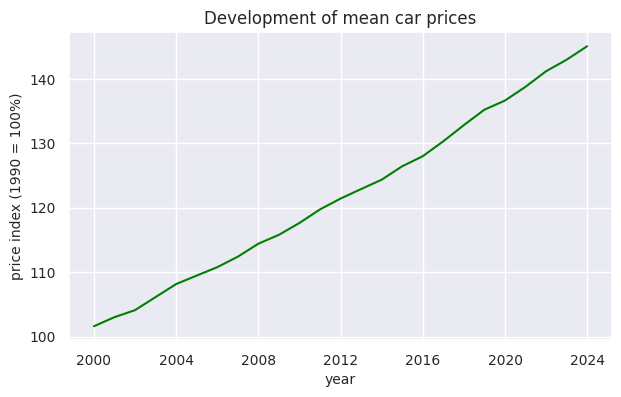

In [81]:
# Generate time series data for mean car prices over the last 20 years
x = []
y = []


# Start from 25 years ago with an initial price
start_date_trend = datetime(2000, 1, 1)
initial_price = 100

for i in range(25):
    date = start_date_trend + timedelta(days=365 * i)
    price_increase_factor = 1 + random.uniform(0.01, 0.02)
    initial_price *= price_increase_factor
    x.append(date)
    y.append(round(initial_price, 2))

# Create a DataFrame to display the data
car_prices_trend_df = pd.DataFrame({
    "Year": x,
    "Car Price (USD)": y
})


# Create figure
fig = plt.figure(figsize=(7,4))
plt.plot(x, y, color="green")
plt.title('Development of mean car prices', fontsize=12)
plt.xlabel('year', fontsize=10)
plt.ylabel('price index (1990 = 100%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.show()


### Boxplot (seaborn)

<Axes: xlabel='mileage'>

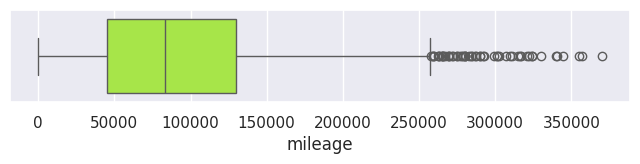

In [83]:
# Create a boxplot of the variable mileage

plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['mileage'], color="greenyellow")

### Histogram  (matplotlib)

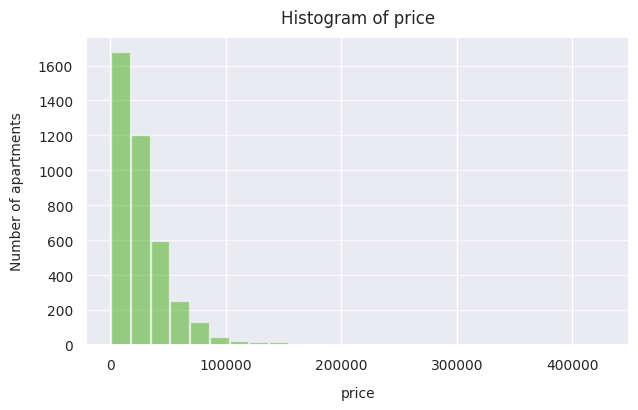

In [84]:
# Plot Histogram of the variable price


# Create figure
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df['price'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('price', fontsize=10, labelpad=10)
plt.ylabel('Number of apartments', fontsize=10, labelpad=10)
plt.title('Histogram of price', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)


# Show plot
plt.show()

### Density plot  (seaborn)

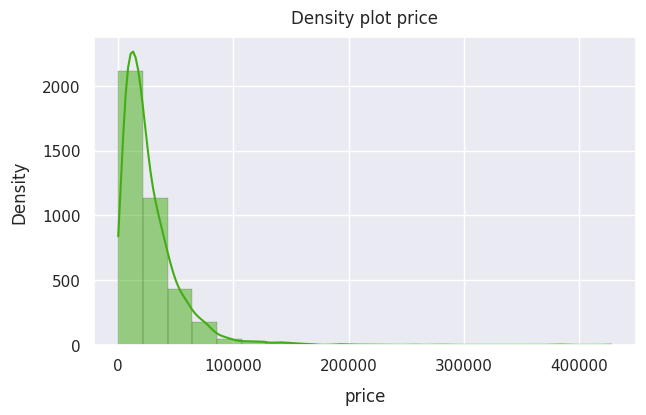

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(df['price'], 
             bins=20, 
             color='#42AD12',
             alpha=0.5,
             kde=True, 
             edgecolor='black', 
             linewidth=0.1)

plt.title('Density plot price', fontsize=12, pad=10)
plt.xlabel('price', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

### Quantile-Quantile (QQ-) plot

In [ ]:
# Create qqplot of the variable mileage


# Variable (standardized)

    
# Plot


### Barchart  (matplotlib)

In [ ]:
# Group data by fuel_type (only the topmost 15 values are shown)


# Values for barchart


# Figure


# Show graph


### Piechart (matplotlib)

In [ ]:
# Subset of cars with fuel type (only Diesel, Benzin and Elektro)


# Group data by  (only the 8 most frequently occurencies)


# Simple bar chart


# Show plot

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

In [ ]:
# Create a scatterplot of the variables hp and price


### Scatterplot (matplotlib) with regression line

In [ ]:
# Create a scatterplot of the variables hp and price


# Add a regression line (b = slope, a=intercept) to the plot


# Show plot


### Scatterplot-matrix (seaborn)

In [ ]:
# Create a scatterplot of the variables mileage, price and hp


# Show plot


### Hexagonal binning plot  (matplotlib)

In [ ]:
# Subset of cars with price <= 100000 and hp <= 400


# Create a scatterplot of the variables hp and price


# Set axes labels


# Show plot

### Correlation heatmap (seaborn)

In [ ]:
# Create correlation matrix with variable price, mileage and hp


# Plot heatmap


### Bubble plot (seaborn)

In [ ]:
# Create a scatterplot of the variables mileage, price, hp, price_per_hp
# price on the y-axis
# hp on the x-axis
# price_per_hp determines bubble size
# mileage determines color



### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [ ]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-11-09 13:05:56
Python Version: 3.11.10
-----------------------------------
